In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.optimizers import SGD
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


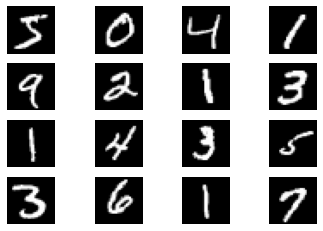

In [3]:
# Plot first few images
img_index = 0
f, axarr = plt.subplots(4, 4)

for x, y in np.ndindex((4, 4)):
  axarr[x,y].imshow(X_train[img_index], cmap=plt.get_cmap('gray'))
  axarr[x,y].axis("off")
  img_index += 1
 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of digit classes')

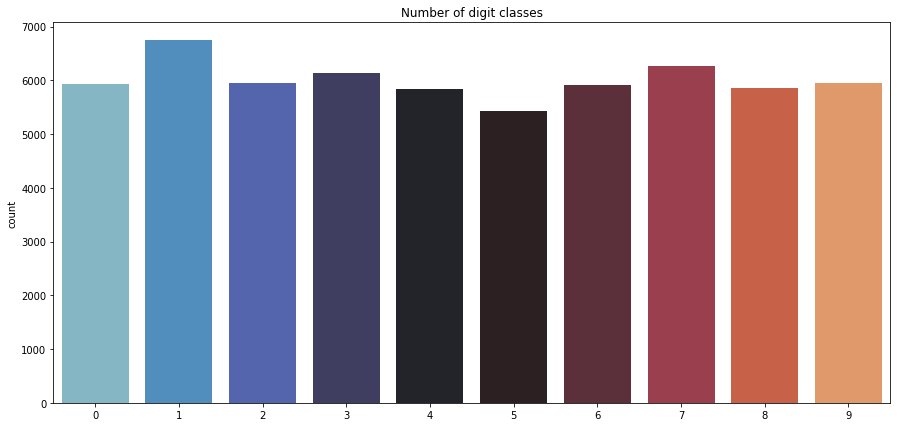

In [6]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")
# y_train.value_counts()

In [ ]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Reshape data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# Use one hot encoding to transform the labels to data that the model can understand
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(y_train.shape[1], activation='softmax'))

opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
  datagen.flow(X_train, y_train, batch_size=250),
  epochs=20,
  validation_data=(X_test, y_test)
)

Epoch 1/20
240/240 [==============================] - 17s 65ms/step - loss: 1.0650 - accuracy: 0.6775 - val_loss: 0.2279 - val_accuracy: 0.9458
Epoch 2/20
240/240 [==============================] - 15s 63ms/step - loss: 0.2391 - accuracy: 0.9251 - val_loss: 0.0635 - val_accuracy: 0.9829
Epoch 3/20
240/240 [==============================] - 16s 65ms/step - loss: 0.1781 - accuracy: 0.9439 - val_loss: 0.0589 - val_accuracy: 0.9812
Epoch 4/20
240/240 [==============================] - 16s 65ms/step - loss: 0.1507 - accuracy: 0.9527 - val_loss: 0.0411 - val_accuracy: 0.9871
Epoch 5/20
240/240 [==============================] - 15s 62ms/step - loss: 0.1341 - accuracy: 0.9599 - val_loss: 0.0477 - val_accuracy: 0.9841
Epoch 6/20
240/240 [==============================] - 15s 62ms/step - loss: 0.1149 - accuracy: 0.9640 - val_loss: 0.0349 - val_accuracy: 0.9890
Epoch 7/20
240/240 [==============================] - 16s 65ms/step - loss: 0.1040 - accuracy: 0.9678 - val_loss: 0.0340 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 32)         

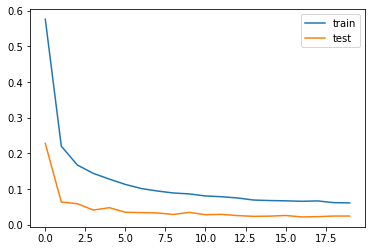

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0243 - accuracy: 0.9913


[0.024269266054034233, 0.9912999868392944]

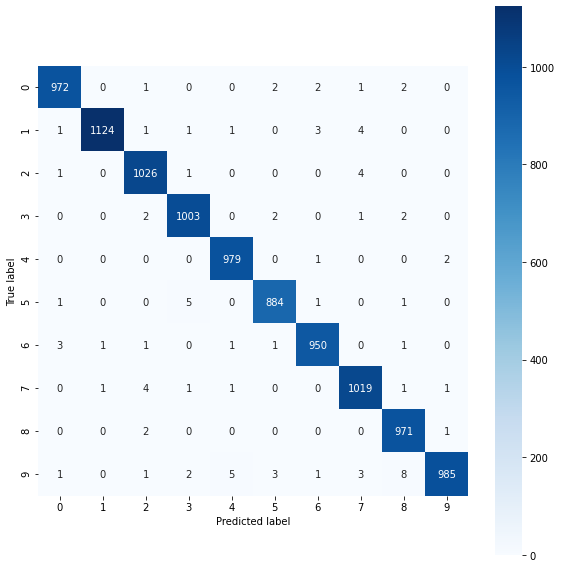

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

y_test_round = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_round, y_pred)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, square=True, fmt="")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()